In [1]:
from src.chatbot4 import IndexQuerySol4

import os
from dotenv import load_dotenv
from pinecone import Pinecone, ServerlessSpec
from openai import OpenAI

from langchain.chat_models import ChatOpenAI
from langchain.chains import RetrievalQA

## Overvejelser om parametre:

### Threshold: 
Threshold er vigtig for at botten kan svare på ikke-firma specifikke spørgsmål på en ordentlig måde. 

**Eksempel**

Efter en række andre forespørgsler:

- Query:
*Hi, my name is Carl. Where should I go on holiday tomorrow?*


- Svar (threshold = 0): *Hej Carl. Hvor skal jeg tage på ferie i morgen?*
- Svar (threshold = 0.2): *Hej Carl. Du bør tage på ferie til København, som blev kåret som den bedste lufthavn for sin unikke stemning ved Global Travel Retail Awards.*

In [4]:
load_dotenv('.env')
PINECONE_KEY = os.environ.get("PINECONE_KEY")
INDEX_NAME =  'index-cas-onboarding' #"index-cas-onboarding"
OPENAI_KEY = os.getenv("OPENAI_KEY")
os.environ["OPENAI_API_KEY"] = OPENAI_KEY
MODEL_EMBEDDING = 'text-embedding-3-small'
MODEL_CHAT = 'gpt-3.5-turbo'

# Hyperparameters
TOP_K = 3
THRESHOLD = 0.2 # minimum score of retrieved documents
LIMIT_TXT_PROMPT = 10000
TEMPERATURE = 0
RERANK_K = 3

parameter_dict = {'temperature': TEMPERATURE,
                    'threshold': THRESHOLD,
                    'top_k': TOP_K,
                    'rerank_k': RERANK_K}

    # Create class
result = IndexQuerySol4(index_name=INDEX_NAME,
                        api_key_pinecone=PINECONE_KEY,
                        model_embedding_name=MODEL_EMBEDDING,
                        model_chat_name=MODEL_CHAT,
                            api_key_openai=OPENAI_KEY,
                            parameter_dict=parameter_dict)

ValidationError: 1 validation error for CrossEncoderReranker
model
  none is not an allowed value (type=type_error.none.not_allowed)

In [3]:
print(result.complete('Tell me about the terms a Jeudan\'s lease agreement with maturity periods longer than 5 years'))

I Jeudans lejekontrakter med løbetider længere end 5 år har parterne typisk en opsigelsesadgang efter 10 år og herefter hvert 5. år. Hvis renteaftalen ikke opsiges i den angivne periode, fortsætter den automatisk.


In [4]:
print(result.make_prompt('Tell me about the terms a Jeudan\'s lease agreement with maturity periods longer than 5 years'))

Answer the main question based on the context and former queries of the user below.

Context:
I de seneste tre regnskabsår har Jeudan haft tab ved mislighol - delse af lejekontrakter i niveauet DKK 4,5 mio. pr. år, svarende til 0,2 % af omsætningen i 2022. Regulering af lejeindtægter I samtlige af Jeudans lejeforhold er der indgået en lejekontrakt mellem kunden og Jeudan. Erhvervslejeindtægter udgør mere end 90 % af Jeudans samlede lejeindtægter, og erhvervsleje - kontrakterne indeholder typisk bestemmelser om (i) regulering af lejen i relation til udviklingen i nettoprisindekset (evt. med en bestemmelse om en mindste og/eller højeste reguleringssats), (ii) regulering af lejen med ændringen i visse driftsomkostnin - ger, for eksempel skatter og afgifter og (iii) regulering af lejen grundet forbedringer af lejemålet finansieret af Jeudan. Herudover er der enkelte lejemål, der har en omsætningsbe - stemt leje. Dette indebærer, at lejen årligt reguleres i overens - stemmelse med kundens o

In [5]:
string_test = 'Havde Jeudan nogle anlægslån i udgangen af 2022?' #11563 burde kunne svare

print(result.make_prompt(string_test))

Answer the main question based on the context and former queries of the user below.

Context:
urealiserede kursgevinster på Jeudans renteaftaler (DKK 187- 207 mio. før skat) i takt med at restløbetiden forkortes. Likviditetsrisiko Jeudans likviditetsrisiko består i ikke at kunne afvikle løbende betalinger samt i ikke at kunne tilvejebringe tilstrækkelig likvi - ditet til finansiering af Jeudans drift og udvikling. En sådan situation kan opstå som følge af svigtende betalinger fra Jeudans kunder, stor tomgang eller uforudsete omkostninger. Realkreditlån kan kun opsiges af långiver i tilfælde, hvor debitor misligholder sine forpligtelser. Jeudans anlægslån og driftskreditter kan af långiver opsiges med kort varsel. Risiko - en herfor begrænses imidlertid af en løbende dialog mellem Jeudan og långiverne samt af Jeudans kreditværdighed. Ved udgangen af 2022 har Jeudan ingen anlægslån. Jeudan anvender i størst muligt omfang lån med mulighed for en indledende afdragsfri periode. Kreditforeni

In [6]:
print(result.complete(string_test))

Jeudan havde ingen anlægslån ved udgangen af 2022.


In [7]:
input_vector = result.embed_input(string_test)
retrieved = result.query_index(input_vector, top_k=3)
print(retrieved)

{'matches': [{'id': '11563',
              'metadata': {'page': 22.0,
                           'source': 'C:\\omx_data\\Årsrapport\\Jeudan_aarsrapport_2022.pdf',
                           'text': 'urealiserede kursgevinster på Jeudans '
                                   'renteaftaler (DKK 187- 207 mio. før skat) '
                                   'i takt med at restløbetiden forkortes. '
                                   'Likviditetsrisiko Jeudans '
                                   'likviditetsrisiko består i ikke at kunne '
                                   'afvikle løbende betalinger samt i ikke at '
                                   'kunne tilvejebringe tilstrækkelig likvi - '
                                   'ditet til finansiering af Jeudans drift og '
                                   'udvikling. En sådan situation kan opstå '
                                   'som følge af svigtende betalinger fra '
                                   'Jeudans kunder, stor tomgang 

In [8]:
input_vector = result.embed_input(string_test)
retrieved = result.query_index(input_vector, top_k=10)

for r in retrieved['matches']:
    print(r['id'])

11563
11862
11803
11861
11541
11553
11502
11531
11854
11879


In [9]:
assert '11563' in [x['id'] for x in retrieved['matches'] ]

In [10]:
retrieved['matches']['id']

TypeError: list indices must be integers or slices, not str

In [ ]:
[x['id'] for x in retrieved['matches'] ]

['11563',
 '11862',
 '11803',
 '11861',
 '11541',
 '11553',
 '11502',
 '11531',
 '11854',
 '11879']

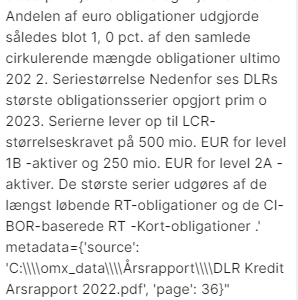

In [11]:
# 1524

string_test2 = 'Hvor stor var andelen af euro obligationer i 2022 hos DLR Kredit?'

input_vector = result.embed_input(string_test2)
retrieved = result.query_index(input_vector, top_k=3)
assert '1524' in [x['id'] for x in retrieved['matches'] ]

In [12]:
result.complete(string_test2)

'Andelen af euro obligationer i 2022 hos DLR Kredit udgjorde blot 1,0 pct. af den samlede cirkulerende mængde obligationer ultimo 2022.'

In [13]:
string_test3 = 'What were the points on the GM April 2023 in BI Boligejendomme?'#'Hvad omhandlede generalforsamlingen 2023-05?'
input_vector = result.embed_input(string_test3)
retrieved = result.query_index(input_vector, top_k=3)
retrieved
#assert '1524' in [x['id'] for x in retrieved['matches'] ]

{'matches': [{'id': '12103',
              'metadata': {'page': 0.0,
                           'source': 'C:\\omx_data\\Indkaldelse til '
                                     'generalforsamling\\Indkaldelse OGF BI '
                                     'Boligejendomme 2023.pdf',
                           'text': 'Indkaldelse til generalforsamling Herved '
                                   'indkaldes til ordinær generalforsamling '
                                   'torsdag den 27. april 2023, kl. 10.00, i '
                                   'BI Boligejendomme A/S Generalforsamlinge n '
                                   'finder sted på BI Management A/S’ kontor '
                                   'Bredgade 40, 1260 København K. Der '
                                   'serveres ikke traktement i forbindelse med '
                                   'generalforsamlingen. Dagsorden: 1. '
                                   'Bestyrelsens beretning for det forløbne år '
               

In [14]:
print(result.complete(string_test3))

Punkterne på generalforsamlingen i april 2023 hos BI Boligejendomme var: 1. Bestyrelsens beretning for det forløbne år 2. Forelæggelse af årsrapport til godkendelse 3. Beslutning om anvendelse af overskud eller dækning af tab i henhold til den godkendte årsrapport 4. Godkendelse af vederlagspolitik 5. Vejledende afstemning om vederlagsrapporten 6. Valg af medlemmer til bestyrelsen 7. Valg af revisor 8. Ændring af vedtægterne 9. Bemyndigelse til at erhverve egne aktier 10. Beslutning om kapitalnedsættelse 11. Eventuelt.


## Test memory:

1-----

In [15]:
print(result.complete('Hi, my name is Carl. Where should I go on holiday tomorrow?'))

Hej Carl, du bør tage på ferie til København i morgen for at opleve den bedste lufthavn med en stærk følelse af sted.


In [16]:
print(result.complete('What is my name?'))

Dit navn er Carl.


IT WORKS!

2------

In [17]:
print(result.complete('I am only concerned about England in my following questions'))

Jeg er kun interesseret i England i mine følgende spørgsmål.


In [20]:
print(result.make_prompt('What is the name of the queen?'))

Answer the main question based on the context and former queries of the user below.

Context:
On 11 September, guests streamed in from near and far to celebrate HM The Queen’s golden jubilee. Among the many guests ar - riving at Copenhagen Airport were the King and Queen of Norway, the King and Queen of Sweden and the Presidents of Finland and Iceland. On 20 September, the Danish government launched its “Green aviation for all” initiative at a press conference at Copenhagen Airport. The proposal to impose a climate levy of DKK 13 seized on the principle proposed by the Climate Partnership for Aviation of using a passenger contribution to kick-start the industry’s green transition. PERFORMANCE / PASSENGERS & TERMINALS 25 25 (Source: C:\omx_data\Årsrapport\Copenhagen Airports AS Group Annual Report 2022 UK.pdf, page 24.0)

---

business and team in Malta, covering not only the compliance and regulatory aspects but also serving as the lead client relationship director, managing the direct

In [21]:
print(result.complete('What is the name of the queen?'))

Dronningen hedder HM The Queen.


It does NOT work :-()

## Test temperature

In [22]:
# Hyperparameters
TOP_K = 3
THRESHOLD = 0 # minimum score of retrieved documents
LIMIT_TXT_PROMPT = 10000
TEMPERATURE = 0.2

parameter_dict = {'temperature': TEMPERATURE,
                    'threshold': THRESHOLD,
                    'top_k': TOP_K}

    # Create class
result = IndexQuerySol1(index_name=INDEX_NAME,
                        api_key_pinecone=PINECONE_KEY,
                        model_embedding_name=MODEL_EMBEDDING,
                        model_chat_name=MODEL_CHAT,
                            api_key_openai=OPENAI_KEY,
                            parameter_dict=parameter_dict)

In [23]:
# Run default query

print(result.complete('What is the favorite dish of Garfield?'))

Garfields yndlingsret er lasagne.


IT WORKS!

# Model 2

In [1]:
from chatbot2 import IndexQuerySol2

import os
from dotenv import load_dotenv
from pinecone import Pinecone, ServerlessSpec
from openai import OpenAI

from langchain.chat_models import ChatOpenAI
from langchain.chains import RetrievalQA

ModuleNotFoundError: No module named 'chatbot2'

In [5]:
load_dotenv('.env')
PINECONE_KEY = os.environ.get("PINECONE_KEY")
INDEX_NAME =  'index-cas-onboarding' #"index-cas-onboarding"
OPENAI_KEY = os.getenv("OPENAI_KEY")
MODEL_EMBEDDING = 'text-embedding-3-small'
MODEL_CHAT = 'gpt-3.5-turbo'

# Hyperparameters
TOP_K = 3
THRESHOLD = 0.2 # minimum score of retrieved documents
LIMIT_TXT_PROMPT = 10000
TEMPERATURE = 0.4

parameter_dict = {'temperature': TEMPERATURE,
                    'threshold': THRESHOLD,
                    'top_k': TOP_K}

    # Create class
result = IndexQuerySol2(index_name=INDEX_NAME,
                        api_key_pinecone=PINECONE_KEY,
                        model_embedding_name=MODEL_EMBEDDING,
                        model_chat_name=MODEL_CHAT,
                            api_key_openai=OPENAI_KEY,
                            parameter_dict=parameter_dict)

In [6]:
result.complete('What is the favorite dish of Garfield?')

PermissionDeniedError: Error code: 403 - {'error': {'message': 'You are not allowed to sample from this model', 'type': 'invalid_request_error', 'param': None, 'code': None}}

## Access to Langchain models

In [2]:
from langchain_core.output_parsers import StrOutputParser
from langchain_openai.chat_models import ChatOpenAI
from langchain_openai import OpenAIEmbeddings
from langchain_pinecone import PineconeVectorStore

model = ChatOpenAI( model="gpt-3.5-turbo")

parser = StrOutputParser()

chain = model | parser
answer = chain.invoke("Name 3 yellow spring flowers.")
print(answer)

ValidationError: 1 validation error for ChatOpenAI
__root__
  Did not find openai_api_key, please add an environment variable `OPENAI_API_KEY` which contains it, or pass `openai_api_key` as a named parameter. (type=value_error)

In [6]:
index_name = "bupl-index"
embeddings = OpenAIEmbeddings()
vectorstore = PineconeVectorStore(index_name=index_name,
                                          embedding = embeddings
                                          )

In [7]:
chain = RetrievalQA.from_chain_type(
        llm=model,
        chain_type="stuff",
        retriever=vectorstore.as_retriever() )

In [8]:
chain.invoke('Hello')

{'query': 'Hello', 'result': 'Hello! How can I assist you today?'}

In [3]:
load_dotenv('.env')
PINECONE_KEY = os.environ.get("PINECONE_KEY")
INDEX_NAME =  'index-cas-onboarding' #"index-cas-onboarding"
OPENAI_KEY = os.getenv("OPENAI_KEY")
os.environ["OPENAI_API_KEY"] = OPENAI_KEY
MODEL_EMBEDDING = 'text-embedding-3-small'
MODEL_CHAT = 'gpt-3.5-turbo'

# Hyperparameters
TOP_K = 3
THRESHOLD = 0.2 # minimum score of retrieved documents
LIMIT_TXT_PROMPT = 10000
TEMPERATURE = 0
RERANK_K = 3

parameter_dict = {'temperature': TEMPERATURE,
                    'threshold': THRESHOLD,
                    'top_k': TOP_K,
                    'rerank_k': RERANK_K}

    # Create class
result = IndexQuerySol4(index_name=INDEX_NAME,
                        api_key_pinecone=PINECONE_KEY,
                        model_embedding_name=MODEL_EMBEDDING,
                        model_chat_name=MODEL_CHAT,
                            api_key_openai=OPENAI_KEY,
                            parameter_dict=parameter_dict)

ValidationError: 1 validation error for CrossEncoderReranker
model
  none is not an allowed value (type=type_error.none.not_allowed)